In [1]:
pip install opencv-python

Image uploaded. Detecting weapons...

0: 800x800 1 Gun, 1 rifle, 1025.6ms
Speed: 13.1ms preprocess, 1025.6ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)


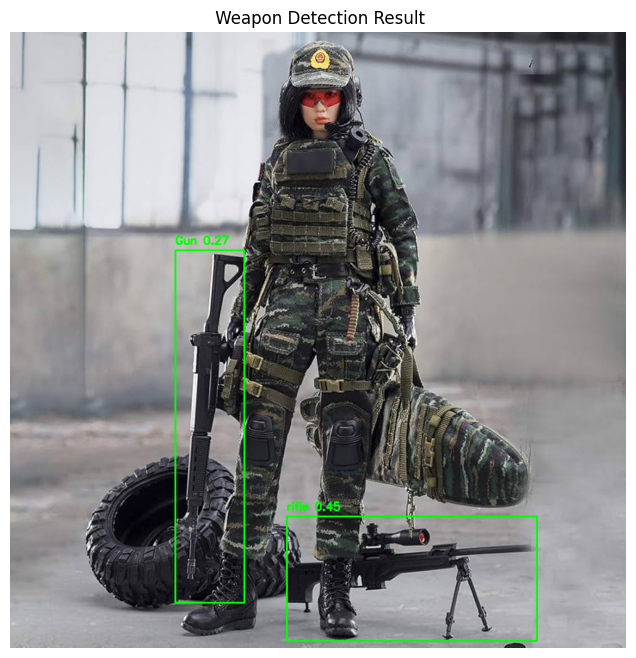

In [3]:
!pip install ultralytics --quiet
!pip install ipywidgets --quiet
!wget https://github.com/GingerBrains/object-detection/raw/main/best.pt -O best.pt
from ultralytics import YOLO
model = YOLO('best.pt')
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import io
import ipywidgets as widgets
from IPython.display import display, clear_output
upload_btn = widgets.FileUpload(accept='image/*', multiple=False)
def handle_upload(change):
    clear_output(wait=True)
    print("Image uploaded. Detecting weapons...")
    uploaded_file = next(iter(upload_btn.value.values()))
    image_bytes = uploaded_file['content']
    image = Image.open(io.BytesIO(image_bytes)).convert("RGB")
    image_np = np.array(image)
    image_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
    results = model(image_bgr)[0]
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        label = f"{model.names[cls]} {conf:.2f}"
        cv2.rectangle(image_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_bgr, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    result_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(result_rgb)
    plt.axis("off")
    plt.title(" Weapon Detection Result")
    plt.show()
upload_btn.observe(handle_upload, names='value')
print("📤 Upload an image to detect weapons:")
display(upload_btn)
